<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Talleres/Taller%201/MINE_4206_202510_AML_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Taller 1**

- **Integrante 1:** David Esteban Fajardo Torres
- **Integrante 2:** Lizeth Viviana Perdomo Castañeda

### **Problemática**:
El cambio climático, impulsado por la emisión de gases de efecto invernadero como el CO2, está provocando el calentamiento global y un aumento en los desastres ambientales. La contaminación del aire y la pérdida de biodiversidad son algunas de sus consecuencias, lo que hace necesario establecer políticas y planes de gestión de riesgos para mitigar sus efectos. Una de las estrategias clave es la movilidad sostenible, que busca reducir las emisiones de CO2 mediante alternativas como el uso de vehículos eléctricos y bicicletas. Estas medidas no solo contribuyen a disminuir la contaminación, sino que también mejoran la calidad del aire y la salud pública.

En este contexto, los sistemas de alquiler de bicicletas en ciudades han surgido como una solución efectiva para reducir la congestión vehicular y fomentar el transporte ecológico. Sin embargo, uno de sus principales retos es la distribución desequilibrada de bicicletas en las estaciones, lo que afecta su disponibilidad y la satisfacción de los usuarios. Para optimizar su funcionamiento, se requieren soluciones basadas en datos que permitan predecir la demanda en tiempo real, considerando factores como el clima, la hora del día, la ubicación, etc. Esto facilitaría una mejor gestión del sistema, asegurando que las bicicletas estén disponibles en los momentos y lugares adecuados.

### **Objetivos:**

- Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la demanda sobre el uso de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
- Determinar cuáles son los factores que más inciden en la demanda con base en los datos.


> Nota: Los datos y el diccionario de datos lo pueden encontrar en el [repositorio de github](https://github.com/fcastellanosp/MINE-4206_202510_AML/tree/main/Talleres/Taller%201). No olvidar que la semilla es '77'.

&nbsp;

### **Actividades a realizar:**
1. Exploración y perfilamiento de los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.

2.	Limpieza y preparación de los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.

3.	Construcción de un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: `[2, 3]`. Utiliza para la selección la métrica RMSE.

4.	Construcción de un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para `α: [1, 2, 3, 4, 5]`. Utiliza para la selección la métrica RMSE.

5.	Elaboración de una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE.

6.	Con base en el modelo Lasso determinar las variables más importantes para la predicción.

### **Análisis de resultados:**
Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

- ¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

- ¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.



> **NOTAS IMPORTANTES:**
> - El archivo se debe subir a BloqueNeon en el apartado de 'Actividades' y debe ser en formato .ipynb, ejecutado. **Celda que no esté ejecutada no será evaluada.**
> - El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de ML.
> - El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante.

### **Instalación e importación de librerías**

In [1]:
%pip install ydata-profiling plotly kaggle -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector


### **Cargue de los datos**

In [ ]:
from google.colab import files

files.upload()

In [3]:
data = pd.read_csv("./Datos_Bicicletas_Taller1.csv", delimiter=";")

data.head()

season  weekday weathersit  temp   atemp   hum  windspeed  cnt time_of_day
0  Winter        6      Clear  3.28  3.0014  0.81        0.0   16       Night
1  Winter        6      Clear  2.34  1.9982  0.80        0.0   40       Night
2  Winter        6      Clear  2.34  1.9982  0.80        0.0   32       Night
3  Winter        6      Clear  3.28  3.0014  0.75        0.0   13       Night
4  Winter        6      Clear  3.28  3.0014  0.75        0.0    1       Night

### **1. Exploración y perfilamiento de los datos**

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   12   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   52   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   84   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981  584   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981    9   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning

In [5]:
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Variable objetivo
target_feature = 'cnt'

# Variables categoricas
cat_features = ['time_of_day', 'season', 'weathersit', 'weekday']

Con el análisis exploratorio de los datos se identificaron los siguientes insigths:

- Problemas de consistencia de la información en la variable weekday, ya que según el diccionario de datos ésta es una variable categórica que varía entre 1 y 7, pero en el conjunto de datos varía entre 0 y 6. Se asume que 0 es el primer día de la semana y 6 el último día. 

- Se evidencia que en las variables temperatura y sensación térmica hay una alta correlación, sin embargo, en la variable temperatura hay 441 negativos en comparación con la variable sensación térmica que tiene 1561 negativos, lo que requiere de un mayor análisis para determinar si los valores son adecuados o se presenta algún tipo de inconsistencia en los datos.

- Respecto a la variable windspeed vemos que tiene el 12,5% de los datos en 0, pero no son valores faltantes, por lo que con previa validación del contexto se pueden determinar como valores viables a tener en cuenta en el modelo.

- Hay pocos datos en la categoría Heavy Rain de la varible weathersit, por lo que se puede validar como alternativa consolidar los datos de heavy rain y ligth rain en una sola clase.

- Para el análisis de la variable cnt surge la pregunta ¿cuántas bicicletas tiene la empresa disponible? ¿cuánto es el tiempo de renta de las bicicletas?

### **2. Limpieza y preparación de los datos**

In [7]:
df_train = train.drop_duplicates()

In [8]:
X_train, y_train = df_train.drop([target_feature], axis=1), df_train[target_feature]
display(X_train)
display(y_train)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981   
...       ...      ...         ...    ...      ...   ...        ...   
4832   Summer        1        Mist  25.84  30.9986  0.84     6.0032   
7832     Fall        0       Clear  14.56  15.0002  0.72    16.9979   
9509   Winter        1       Clear   0.46  -2.0014  0.80     7.0015   
8799   Winter        6       Clear   7.98   5.0012  0.57    15.0013   
15063    Fall        1       Clear  16.44  17.0000  0.52     7.0015   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning  
...           ...  
4832      Morning  
7832        Night  
9509        Night  
8799      Morning  
15063       Night  

[13878 rows x 8 columns]

326       12
694       52
16787     84
13096    584
17193      9
        ... 
4832     107
7832      32
9509       2
8799     324
15063    432
Name: cnt, Length: 13878, dtype: int64

In [9]:
X_train['weathersit'] = X_train['weathersit'].replace('Heavy Rain', 'Rain').replace('Light Rain', 'Rain')

In [10]:
# Definamos las variables numericas
num_features = list(set(X_train.columns) - set(cat_features))
num_features

['hum', 'atemp', 'temp', 'windspeed']

In [11]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [13]:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['hum', 'atemp', 'temp',
                                                   'windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['time_of_day', 'season',
                                                   'weathersit',
                                                   'weekday'])]))])

### **3. Modelamiento**

#### 3.1 Regresión Regularizada Lasso

In [14]:
estimators_best = [
        ('transform', preprocessor),
        ('regression', Lasso())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'regression__alpha': [1, 2, 3, 4, 5],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore')]
              }

grid_search_ls = GridSearchCV(pipe_best, parameters, verbose=1, scoring='neg_root_mean_squared_error', cv=5)

In [15]:
grid_search_ls.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['hum',
                                                                          'atemp',
                                                                          'temp',
                                                                          'windspeed']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['time_of_day',
                                                                          'season',
                                                                          'weathersit',
                                                                          'weekday'])])),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [1, 2, 3, 4, 5],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore')],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [16]:
grid_search_ls.best_params_

{'regression__alpha': 1,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': StandardScaler()}

In [17]:
best_rmse_ls = abs(grid_search_ls.best_score_)
print(f"Mejor RMSE encontrado: {best_rmse_ls}")

Mejor RMSE encontrado: 137.13653371421407


In [18]:
best_model_ls = grid_search_ls.best_estimator_

#### 3.2 Regresión Polinomial

In [19]:
estimators_best_pl = [
        ('transform', preprocessor),
        ('polinomial', PolynomialFeatures()),
        ('regression', LinearRegression())
]

pipe_best_pl = Pipeline(estimators_best_pl)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'transform__cat': [OneHotEncoder(handle_unknown='ignore')]
              }

grid_search_pl = GridSearchCV(pipe_best_pl, parameters, verbose=1, scoring='neg_root_mean_squared_error', cv=5)

In [20]:
grid_search_pl.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['hum',
                                                                          'atemp',
                                                                          'temp',
                                                                          'windspeed']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['time_of_day',
                                                                          'season',
                                                                          'weathersit',
                                                                          'weekday'])])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3],
                         'transform__cat': [OneHotEncoder(handle_unknown='ignore')],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [21]:
grid_search_pl.best_params_

{'polinomial__degree': 3,
 'transform__cat': OneHotEncoder(handle_unknown='ignore'),
 'transform__num': 'passthrough'}

In [22]:
best_rmse_pl = abs(grid_search_pl.best_score_)
print(f"Mejor RMSE encontrado: {best_rmse_pl}")

Mejor RMSE encontrado: 130.53349908694054


In [23]:
best_model_pl = grid_search_pl.best_estimator_

### **4. Análisis de resultados**

#### 4.1 Train

In [24]:
y_pred_train_ls = best_model_ls.predict(X_train)

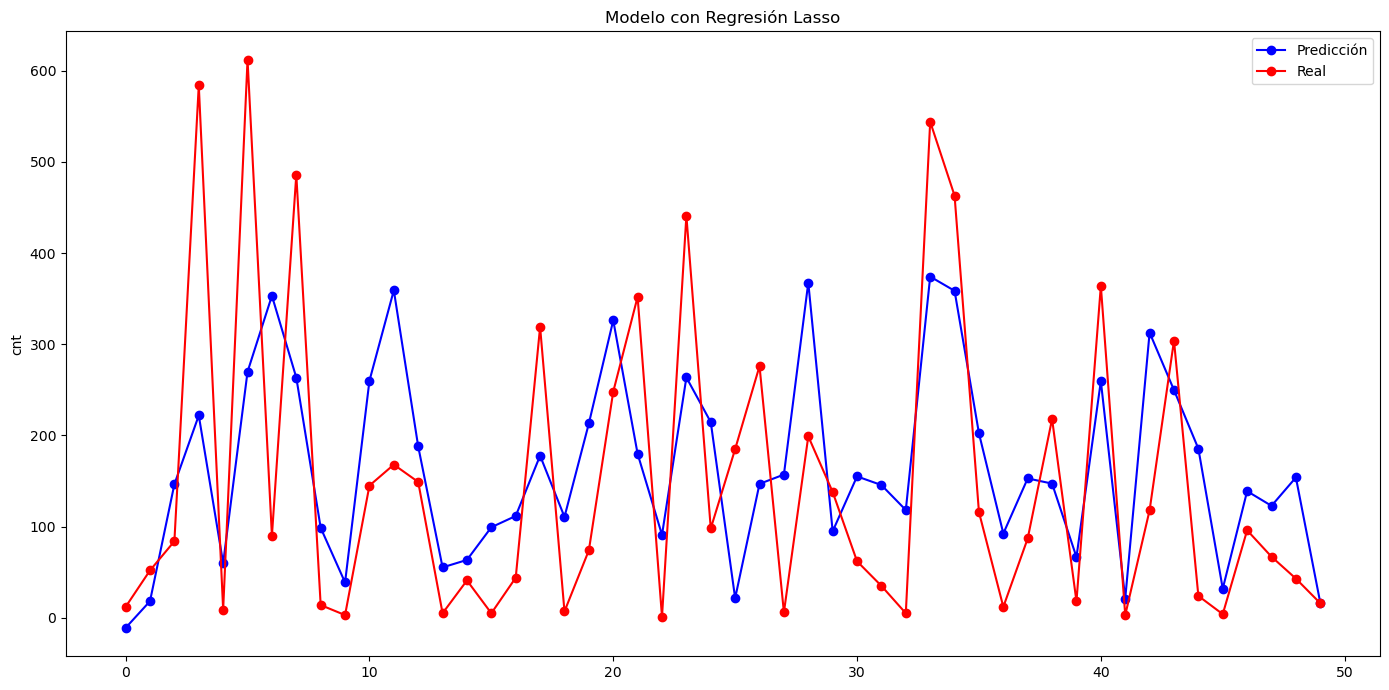

In [25]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_train_ls[:50],'bo-', label='Predicción')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Modelo con Regresión Lasso', ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

In [26]:
y_pred_train_pl = best_model_pl.predict(X_train)

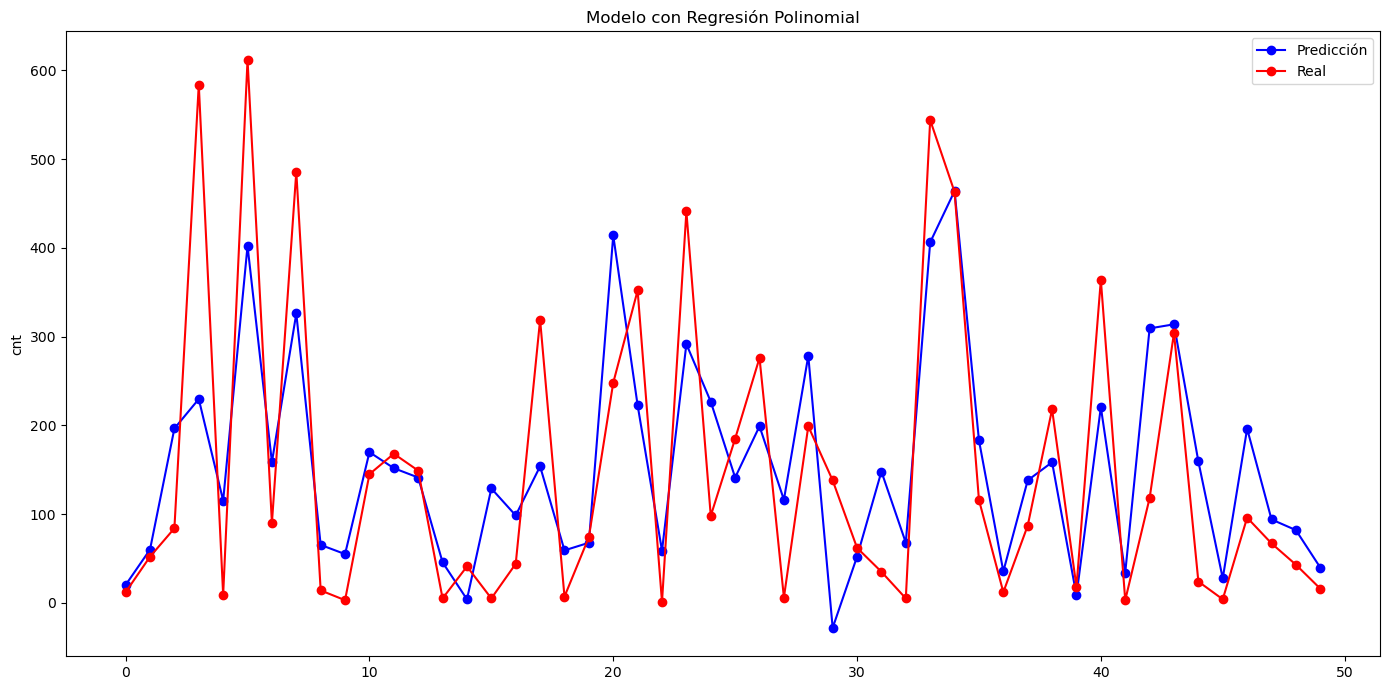

In [27]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_train_pl[:50],'bo-', label='Predicción')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Modelo con Regresión Polinomial', ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

In [28]:
# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    return {
        'R²': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

In [29]:
# Obtener métricas para ambos modelos
metricas_poly_train = calcular_metricas(y_train, y_pred_train_pl)
metricas_lasso_train = calcular_metricas(y_train, y_pred_train_ls)

# Crear DataFrame comparativo
df_comparacion = pd.DataFrame({
    'Métrica': ['R²', 'RMSE', 'MAE'],
    'Regresión Polinomial': list(metricas_poly_train.values()),
    'Regresión Lasso': list(metricas_lasso_train.values())
})


print(df_comparacion)

  Métrica  Regresión Polinomial  Regresión Lasso
0      R²              0.541451         0.431526
1    RMSE            123.051576       137.009228
2     MAE             89.984122       102.330963


#### 4.2 Test

In [30]:
def preprocess(df_to_process):
  df_to_process = df_to_process.drop_duplicates() # Eliminamos duplicados
  df_to_process['weathersit'] = df_to_process['weathersit'].replace('Heavy Rain', 'Rain').replace('Light Rain', 'Rain') # Consolidamos las categorías de lluvia
  X_data, y_variable = df_to_process.drop([target_feature], axis=1), df_to_process[target_feature]
  return X_data, y_variable

In [31]:
X_test, y_test = preprocess(test)

C:\Users\lperd\AppData\Local\Temp\ipykernel_25408\947784340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_process['weathersit'] = df_to_process['weathersit'].replace('Heavy Rain', 'Rain').replace('Light Rain', 'Rain') # Consolidamos las categorías de lluvia


In [36]:
# Predicciones Test
y_pred_poly = best_model_pl.predict(X_test)
y_pred_lasso = best_model_ls.predict(X_test)

# Obtener métricas para ambos modelos
metricas_poly = calcular_metricas(y_test, y_pred_poly)
metricas_lasso = calcular_metricas(y_test, y_pred_lasso)

# Crear DataFrame comparativo
df_comparacion = pd.DataFrame({
    'Métrica': ['R²', 'RMSE', 'MAE'],
    'Regresión Polinomial': list(metricas_poly.values()),
    'Regresión Lasso': list(metricas_lasso.values())
})


print(df_comparacion)


  Métrica  Regresión Polinomial  Regresión Lasso
0      R²              0.490180         0.421243
1    RMSE            128.559005       136.975259
2     MAE             93.908356       101.917063


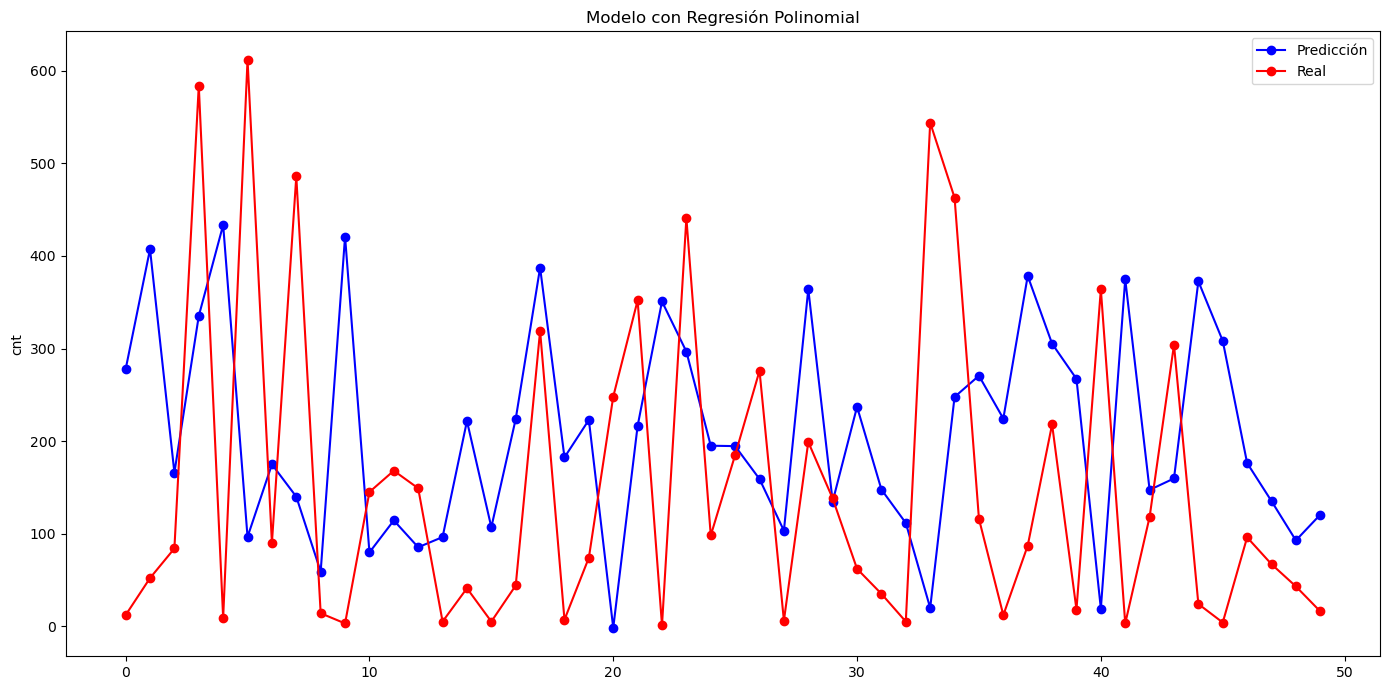

In [33]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_poly[:50],'bo-', label='Predicción')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Modelo con Regresión Polinomial', ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

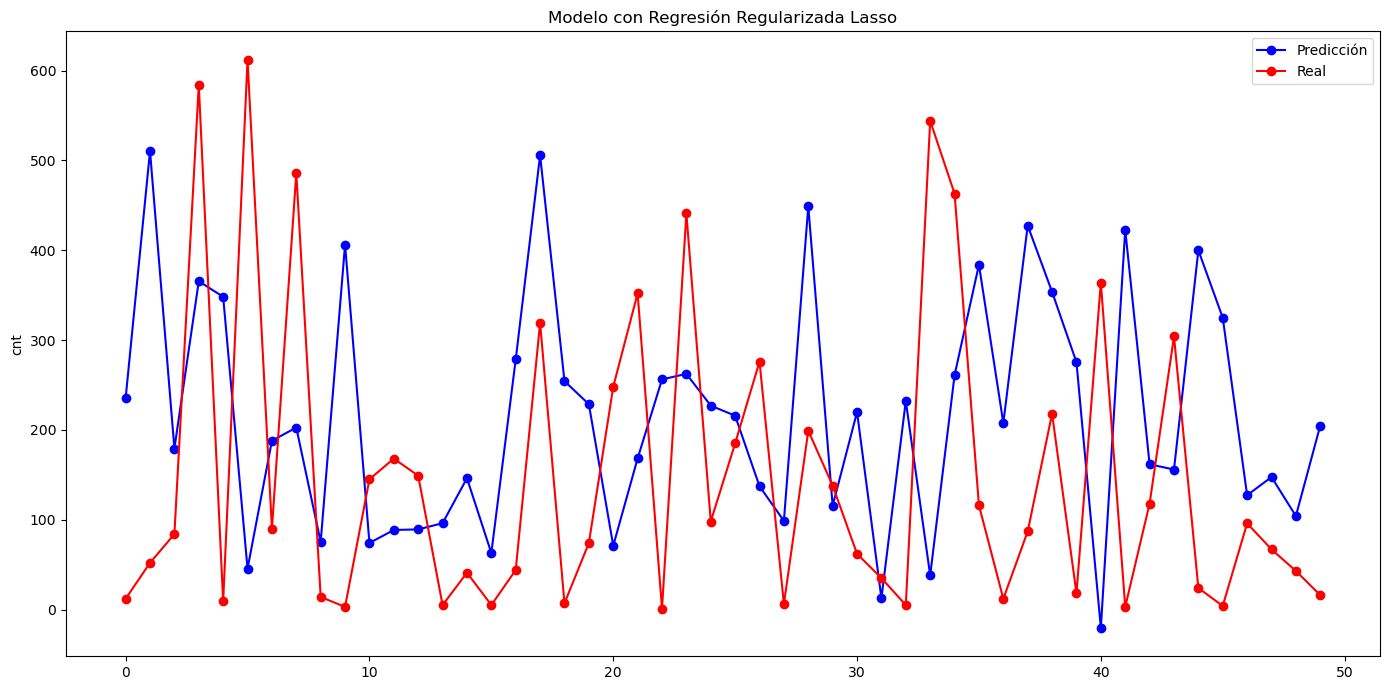

In [34]:
fig, axs = plt.subplots(1,figsize=(14,7))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred_lasso[:50],'bo-', label='Predicción')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Modelo con Regresión Regularizada Lasso', ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

#### 4.3 Variables Lasso más importantes

                    Variable  Coeficiente  Importancia
6     cat__time_of_day_Night   -99.782645    99.782645
4   cat__time_of_day_Evening    82.038710    82.038710
7           cat__season_Fall    43.718703    43.718703
1                 num__atemp    42.342584    42.342584
0                   num__hum   -30.833580    30.833580
13      cat__weathersit_Rain   -23.578538    23.578538
2                  num__temp    17.437206    17.437206
8         cat__season_Spring    11.512401    11.512401
10        cat__season_Winter   -10.059223    10.059223
11     cat__weathersit_Clear     3.008321     3.008321
14            cat__weekday_0    -1.257270     1.257270
9         cat__season_Summer    -1.038396     1.038396
3             num__windspeed    -0.003316     0.003316
5   cat__time_of_day_Morning     0.000000     0.000000
12      cat__weathersit_Mist     0.000000     0.000000
15            cat__weekday_1    -0.000000     0.000000
16            cat__weekday_2    -0.000000     0.000000
17        

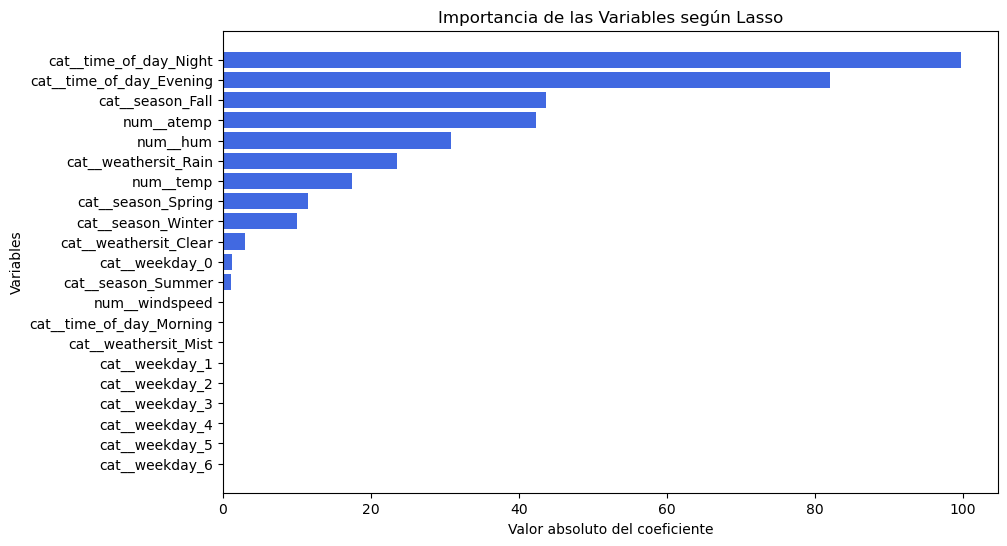

In [35]:
# Obtener el paso final del pipeline (el modelo Lasso)
modelo_lasso = best_model_ls.named_steps['regression']

# Verificar si tiene coeficientes

coeficientes = modelo_lasso.coef_
feature_names = best_model_ls.named_steps['transform'].get_feature_names_out()  # Obtiene los nombres de las variables después de la transformación

# Crear DataFrame con las variables y sus coeficientes
importancia_vars = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coeficientes})
importancia_vars['Importancia'] = np.abs(importancia_vars['Coeficiente'])

# Ordenar por importancia absoluta
importancia_vars = importancia_vars.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla de importancia
print(importancia_vars)
print('\n\n')

# Graficar la importancia de las variables
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importancia_vars['Variable'], importancia_vars['Importancia'], color='royalblue')
plt.xlabel('Valor absoluto del coeficiente')
plt.ylabel('Variables')
plt.title('Importancia de las Variables según Lasso')
plt.gca().invert_yaxis()  # La variable más importante arriba
plt.show()

•	¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

Para el modelo de Regresión Polinomial se seleccionó como hiperparámetro óptimo el grado 3 del polinomio, de acuerdo con la métrica RMSE. 

•	¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

Para el modelo de Regresión Regularizada Lasso se seleccionó como hiperparámetro óptimo el α = 1, de acuerdo con la métrica RMSE. 

•	A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

El modelo de Regresión Polinomial de grado 3 ofrece un mejor rendimiento en todas las métricas:

Tiene un R² mayor (0.49 vs. 0.42) → Explica mejor la variabilidad de los datos.
Tiene un menor error (RMSE y MAE menores) → Sus predicciones están más cerca de los valores reales.

Por lo tanto, la Regresión Polinomial es el mejor modelo sobre el conjunto de prueba. 

•	¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema. 

El modelo de Regresión Lasso seleccionó las siguientes variables con coeficientes distintos de cero, lo que indica que tienen un impacto en la predicción de la variable objetivo:

- cat__time_of_day_Night
- cat__time_of_day_Evening
- cat__season_Fall
- num__atemp
- num__hum
- cat__weathersit_Rain
- num__temp
- cat__season_Spring
- cat__season_Winter
- cat__weathersit_Clear

Lasso eliminó varias variables, lo que significa que no aportan información relevante. Por ejemplo:

- Algunas categorías de hora del día, estación del año y día de la semana no fueron seleccionadas.
- La variable windspeed (velocidad del viento) tiene un coeficiente muy cercano a 0, lo que sugiere que su impacto es mínimo.

Con esta información el negocio puede concluir lo siguiente: 

- La noche tiene un fuerte impacto negativo (-99.78), lo que sugiere que la demanda es mucho menor en ese periodo.
- La tarde (Evening) tiene un impacto positivo (82.04), indicando que hay más demanda en esa franja horaria.
- La mañana fue eliminada (coeficiente 0), lo que indica que su efecto no es relevante o está incluido en otras variables.
- Otoño (Fall) tiene un fuerte impacto positivo (43.72), lo que sugiere una alta demanda en esta estación.
- Primavera (Spring) también tiene un efecto positivo (11.51), aunque menor.
- Invierno (Winter) tiene un impacto negativo (-10.06), indicando menor uso de bicicletas en esta época.
- La lluvia (Rain) reduce la demanda (-23.58), lo cual era esperado.
- El clima despejado (Clear) tiene un leve impacto positivo (3.01).
- Sensación térmica (atemp) tiene un impacto positivo alto (42.34).
- Temperatura (temp) también es positiva (17.44).
- Los días de la semana no son relevantes para la demanda (coeficiente 0 para días de 1 a 6).

Este análisis le permite a la organización:
- Aumentar la oferta de bicicletas en la tarde y en estaciones de alta demanda (otoño y primavera).
- Reducir disponibilidad durante la noche e invierno para evitar costos innecesarios.
- Ofrecer descuentos o incentivos en días de lluvia para mantener la demanda.
